In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ziyadintern","key":"0a4ff0b42bd5b65abdc9589abb85fc33"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d greatgamedota/vggface2-test


Dataset URL: https://www.kaggle.com/datasets/greatgamedota/vggface2-test
License(s): unknown
 99% 1.96G/1.97G [00:25<00:00, 14.3MB/s]
100% 1.97G/1.97G [00:25<00:00, 82.3MB/s]


In [ ]:
!mv vggface2-test.zip /content/drive/MyDrive/


In [ ]:
!unzip /content/drive/MyDrive/vggface2-test.zip -d /content/drive/MyDrive/vggface2-test/


Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0173_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0174_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0176_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0179_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0180_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0181_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0183_03.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0192_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0194_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0195_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0208_01.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0211_02.jpg  
  inflating: /content/drive/MyDrive/vggface2-test/n009114/0212_01.jpg  
  inflating: 

In [ ]:
!pip install tensorflow keras


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50

from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import preprocess_input

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

import os


In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)  # VGG16 input size
TRAIN_DIR = '/content/drive/MyDrive/test_vggface'  # Training dataset directory
NUM_CLASSES = 10  # Number of classes (adjust this to your number of face classes)

# Image preprocessing using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.4,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],  # Brightness variation between 80% and 120%
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of the data for validation
)

# Create train and validation generators
train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Use this for training set
)

val_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Use this for validation set
)


Found 3081 images belonging to 10 classes.
Found 765 images belonging to 10 classes.


In [ ]:
# Load ResNet50 pre-trained on ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze all the layers in the base model
for layer in base_model.layers[-10:]:
    layer.trainable = True



In [ ]:
x = Flatten()(base_model.output)  # Flatten the output layer to 1D
x = Dense(128, activation='relu', kernel_regularizer=l2(0.01))(x)  # L2 regularization
x = Dropout(0.6)(x)  # Dropout to reduce overfitting
output = Dense(NUM_CLASSES, activation='softmax')(x)  # Output layer for classification

# Define the new model
model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
EPOCHS = 20  # You can adjust this based on your hardware and needs

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1
)


Epoch 1/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 2816s 28s/step - accuracy: 0.1231 - loss: 6.2920 - val_accuracy: 0.1168 - val_loss: 4.9181
Epoch 2/20
 1/96 ━━━━━━━━━━━━━━━━━━━━ 14s 148ms/step - accuracy: 0.2188 - loss: 4.8047

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


96/96 ━━━━━━━━━━━━━━━━━━━━ 33s 343ms/step - accuracy: 0.2188 - loss: 4.8047 - val_accuracy: 0.1724 - val_loss: 4.8840
Epoch 3/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 535ms/step - accuracy: 0.2054 - loss: 4.7816 - val_accuracy: 0.1128 - val_loss: 4.9434
Epoch 4/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1875 - loss: 4.8083 - val_accuracy: 0.0690 - val_loss: 4.9324
Epoch 5/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 539ms/step - accuracy: 0.2644 - loss: 4.6222 - val_accuracy: 0.1250 - val_loss: 4.9467
Epoch 6/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3438 - loss: 4.4897 - val_accuracy: 0.0000e+00 - val_loss: 5.1062
Epoch 7/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 536ms/step - accuracy: 0.3275 - loss: 4.4358 - val_accuracy: 0.1291 - val_loss: 4.8154
Epoch 8/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3438 - loss: 4.3282 - val_accuracy: 0.0000e+00 - val_loss: 4.8483
Epoch 9/20
96/96 ━━━━━━━━━━━━━━━━━━━━ 55s 540ms/step - accuracy: 0.3850 - loss: 4.2572 - val_accuracy: 0.1386

In [ ]:
model.save('/content/drive/MyDrive/models_face_recognition/restnet50_face_recognition.h5')

In [ ]:
# Evaluate the model on training data
loss, accuracy = model.evaluate(train_generator)
print(f'Training Accuracy: {accuracy * 100:.2f}%')

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(val_generator)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')


97/97 ━━━━━━━━━━━━━━━━━━━━ 45s 459ms/step - accuracy: 0.7518 - loss: 3.2154
Training Accuracy: 75.40%
24/24 ━━━━━━━━━━━━━━━━━━━━ 11s 446ms/step - accuracy: 0.8154 - loss: 2.9306
Validation Accuracy: 80.78%


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


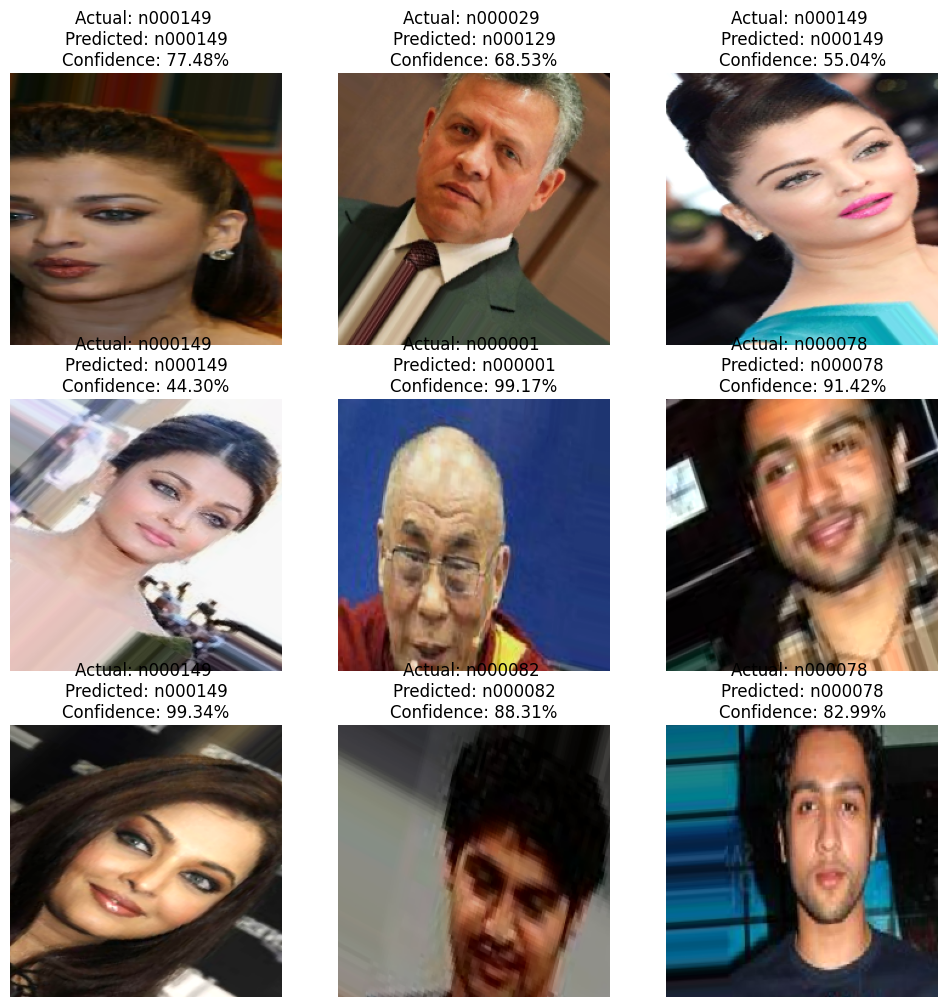

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to predict random images from the validation generator
def predict_random_images(generator, model, num_images=9):
    # Get class indices and names
    class_indices = generator.class_indices
    class_names = list(class_indices.keys())  # Class names in the order of their indices
    total_batches = len(generator)  # Total number of batches
    num_batches = (num_images + generator.batch_size - 1) // generator.batch_size  # Number of batches needed

    # Randomly select batch indices
    random_batches = random.sample(range(total_batches), num_batches)

    images = []
    actual_labels = []
    predicted_classes = []
    confidences = []

    for batch_idx in random_batches:
        # Get the batch of images and labels
        batch_images, batch_labels = generator[batch_idx]

        # Make predictions for the batch
        predictions = model.predict(batch_images)

        # Loop through each image in the batch
        for i in range(len(batch_images)):
            if len(images) >= num_images:
                break  # Stop if we have enough images
            images.append(batch_images[i])
            actual_labels.append(batch_labels[i])
            predicted_class = np.argmax(predictions[i])
            predicted_classes.append(predicted_class)
            confidences.append(np.max(predictions[i]) * 100)  # Get confidence score

    # Plot the images with their actual and predicted labels
    plt.figure(figsize=(12, 12))
    for i in range(num_images):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])  # Display the image
        plt.title(f"Actual: {class_names[np.argmax(actual_labels[i])]} \n"  # Getting the actual class name
                  f"Predicted: {class_names[predicted_classes[i]]}\n"
                  f"Confidence: {confidences[i]:.2f}%")
        plt.axis("off")
    plt.show()

# Call the function to predict 9 random images from the validation generator
predict_random_images(val_generator, model, num_images=9)
